![Cat](https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F37%2F2021%2F06%2F21%2Fvarious-bottles-rose-wine-white-background-6QdoCTqmaBMAfU6XUkCGhW-2000.jpg)
    


<h1>
For this particular assignment, the data of different types of wine Rose in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Rose in the 20th century.

</h1>

1. Read the data as an appropriate Time Series data and plot the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


from pylab import rcParams
from statsmodels.graphics.tsaplots import month_plot,plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose,STL
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [2]:
df_Rose = pd.read_csv("Rose.csv",parse_dates=True,squeeze=True,index_col=0)


In [3]:
df_Rose.head()

YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
Name: Rose, dtype: float64

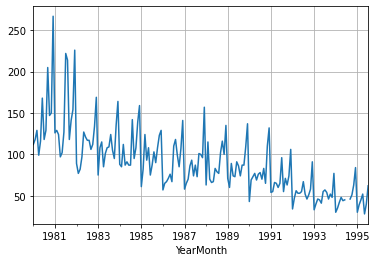

In [4]:
df_Rose.plot();
plt.grid()

2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [5]:
df_Rose.describe()

count    185.000000
mean      90.394595
std       39.175344
min       28.000000
25%       63.000000
50%       86.000000
75%      112.000000
max      267.000000
Name: Rose, dtype: float64

# Plot a year on year boxplot for the Wine production.

C:\Users\athisya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


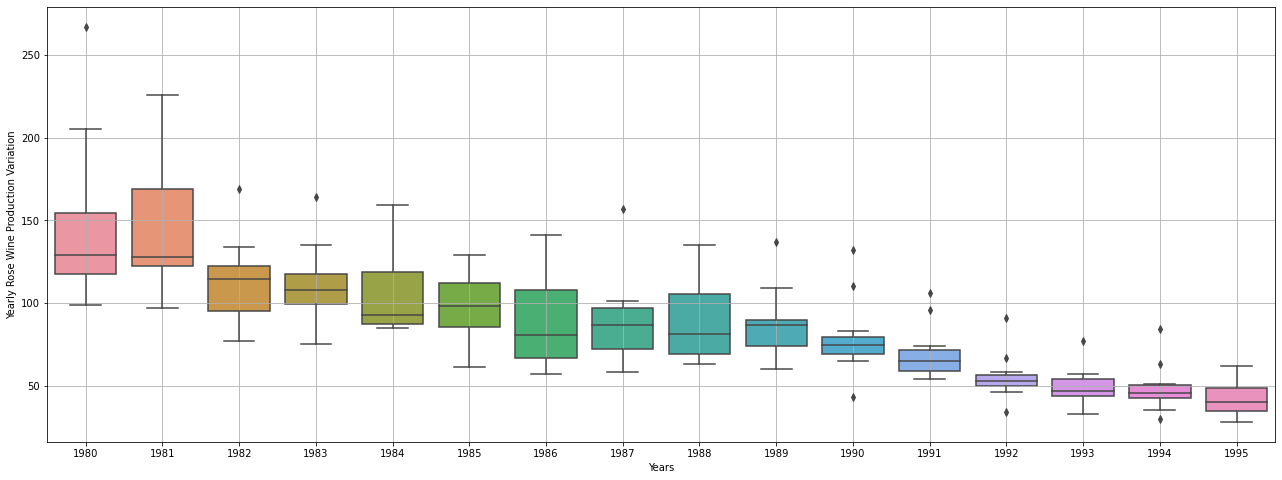

In [6]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_Rose.index.year, df_Rose, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Rose Wine Production Variation');

# Plot a monthly boxplot for the Wine production taking all the years into account.

C:\Users\athisya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


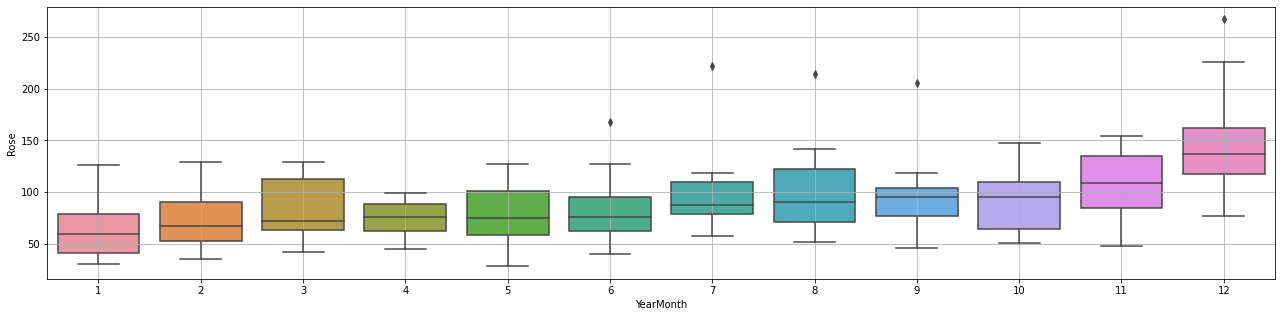

In [7]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df_Rose.index.month, df_Rose, ax=ax,whis=1.5)
plt.grid();

# Plot a monthplot of the give Time Series.

C:\Users\athisya\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
C:\Users\athisya\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


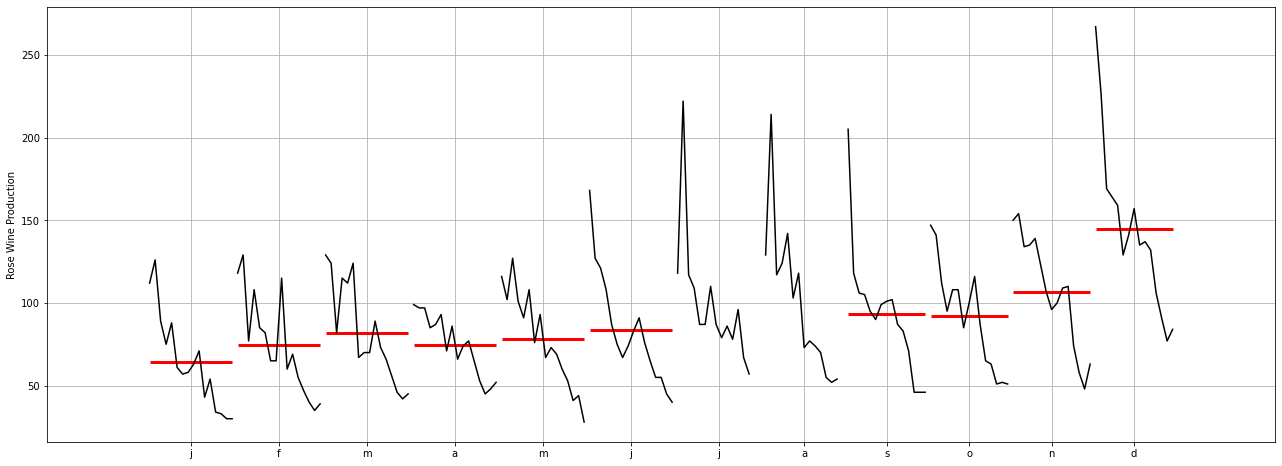

In [8]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_Rose,ylabel='Rose Wine Production',ax=ax)
plt.grid();

# Plot the Time Series according to different months for different years.

In [9]:
df_Rose2 = pd.read_csv("Rose.csv")
df_Rose2

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0
...,...,...
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0


In [10]:

df_Rose2['YearMonth'] = pd.to_datetime(df_Rose2['YearMonth'], format='%Y-%m')

In [11]:
df_Rose2.set_index('YearMonth',inplace=True)
df_Rose2.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [12]:
yearly_Rose_across_months = pd.pivot_table(df_Rose2,values = 'Rose', columns = df_Rose.index.month, 
                                        index = df_Rose.index.year)

yearly_Rose_across_months

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


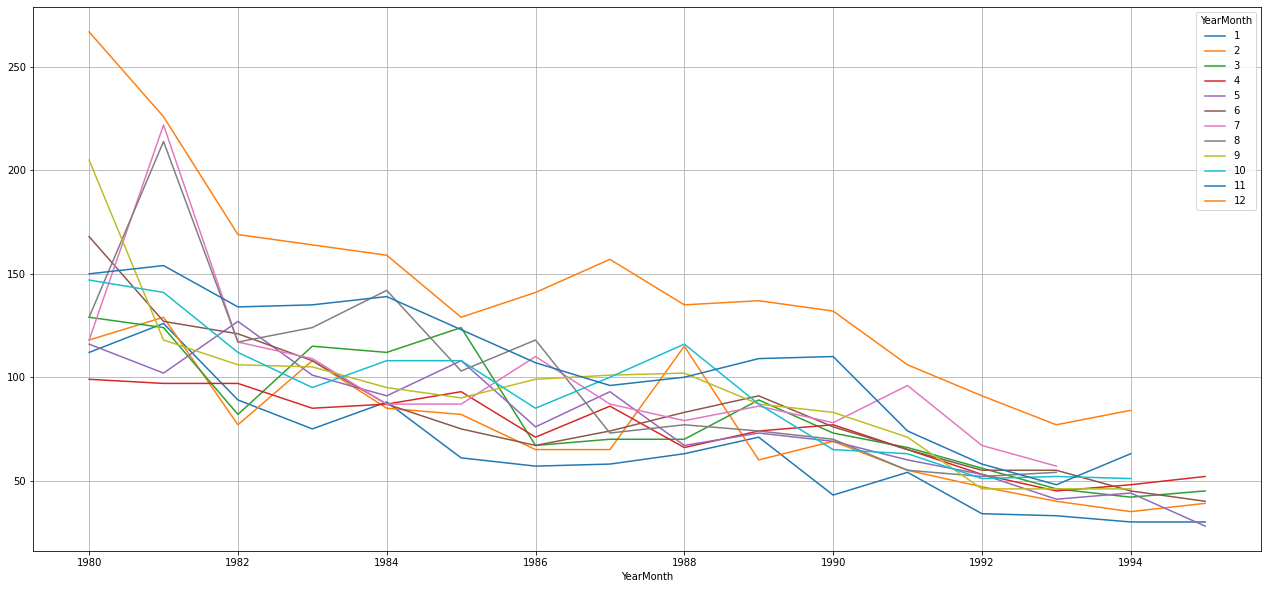

In [13]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_Rose_across_months.plot(ax=ax)
plt.grid();

# Read this monthly data into a quarterly and yearly format. Compare the Time Series plot and draw inferences.


In [14]:
df_yearly_sum = df_Rose.resample('A').sum()
df_yearly_sum.head()

YearMonth
1980-12-31    1758.0
1981-12-31    1780.0
1982-12-31    1348.0
1983-12-31    1324.0
1984-12-31    1280.0
Freq: A-DEC, Name: Rose, dtype: float64

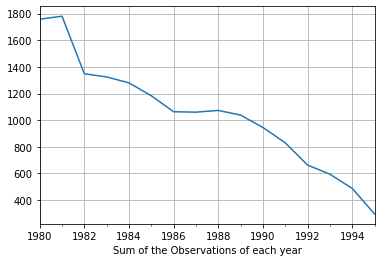

In [15]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [16]:
df_yearly_mean = df_Rose.resample('Y').mean()
df_yearly_mean.head()

YearMonth
1980-12-31    146.500000
1981-12-31    148.333333
1982-12-31    112.333333
1983-12-31    110.333333
1984-12-31    106.666667
Freq: A-DEC, Name: Rose, dtype: float64

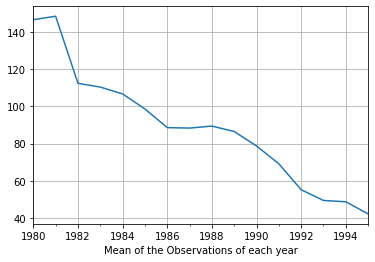

In [17]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

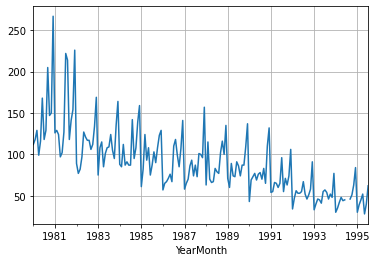

In [18]:
df_Rose.plot()
plt.grid();

### Quarterly Plot

In [19]:
df_quarterly_sum = df_Rose.resample('Q').sum()
df_quarterly_sum.head()

YearMonth
1980-03-31    359.0
1980-06-30    383.0
1980-09-30    452.0
1980-12-31    564.0
1981-03-31    379.0
Freq: Q-DEC, Name: Rose, dtype: float64

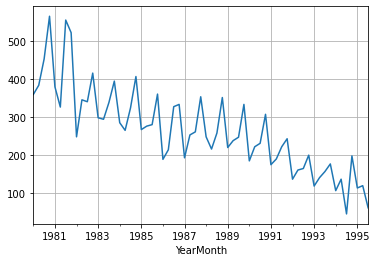

In [20]:
df_quarterly_sum.plot();
plt.grid()

In [21]:
df_quarterly_mean = df_Rose.resample('Q').mean()
df_quarterly_mean.head()

YearMonth
1980-03-31    119.666667
1980-06-30    127.666667
1980-09-30    150.666667
1980-12-31    188.000000
1981-03-31    126.333333
Freq: Q-DEC, Name: Rose, dtype: float64

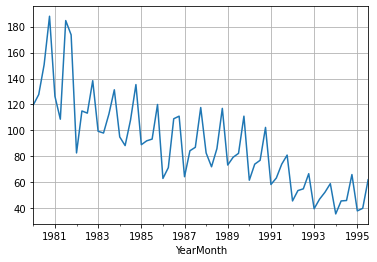

In [22]:
df_quarterly_mean.plot();
plt.grid()

In [23]:
df_quarterly_mean2 = df_Rose.resample('Q').mean()
df_quarterly_mean2.head()

YearMonth
1980-03-31    119.666667
1980-06-30    127.666667
1980-09-30    150.666667
1980-12-31    188.000000
1981-03-31    126.333333
Freq: Q-DEC, Name: Rose, dtype: float64

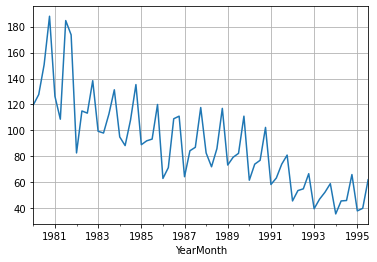

In [24]:
df_quarterly_mean2.plot();
plt.grid()

### Daily Plot

In [25]:
df_daily_sum = df_Rose.resample('D').sum()
df_daily_sum

YearMonth
1980-01-01    112.0
1980-01-02      0.0
1980-01-03      0.0
1980-01-04      0.0
1980-01-05      0.0
              ...  
1995-06-27      0.0
1995-06-28      0.0
1995-06-29      0.0
1995-06-30      0.0
1995-07-01     62.0
Freq: D, Name: Rose, Length: 5661, dtype: float64

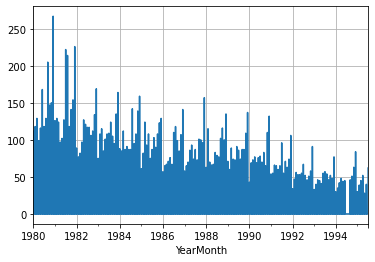

In [26]:
df_daily_sum.plot()
plt.grid();

### Decade Plot

In [27]:
df_decade_sum = df_Rose.resample('10Y').sum()
df_decade_sum

YearMonth
1980-12-31     1758.0
1990-12-31    12094.0
2000-12-31     2871.0
Freq: 10A-DEC, Name: Rose, dtype: float64

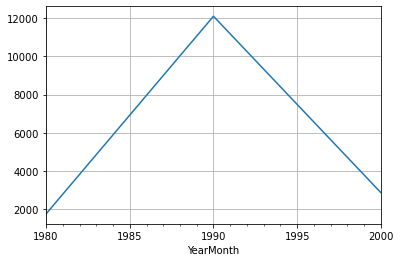

In [28]:
df_decade_sum.plot();
plt.grid()

# Decompose the Time Series


In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
null_data = df_Rose[df_Rose.isna()]

In [31]:
null_data

YearMonth
1994-07-01   NaN
1994-08-01   NaN
Name: Rose, dtype: float64

In [32]:
df_Rose.isna().sum()

2

In [33]:
#df_Rose3 = df_Rose.interpolate()['1994']
#df_Rose.interpolate(method="pad", limit=2)
#df_Rose.interpolate(method ='linear', limit_direction ='forward')
#df_Rose.interpolate(method="pad", limit=2)

In [34]:
#df_Rose.interpolate(method='spline',order=1)['1994']

In [35]:
df_Rose.interpolate(axis=0, method='linear', inplace=True)

In [36]:
#df_Rose.interpolate(method='spline',order=2)['1994'].tail()

In [37]:
#null_data2 = df_Rose[df_Rose.isna()]

In [38]:
#null_data2

In [39]:
df_Rose.isna().sum()

0

In [40]:
df_Rose.isna()

YearMonth
1980-01-01    False
1980-02-01    False
1980-03-01    False
1980-04-01    False
1980-05-01    False
              ...  
1995-03-01    False
1995-04-01    False
1995-05-01    False
1995-06-01    False
1995-07-01    False
Name: Rose, Length: 187, dtype: bool

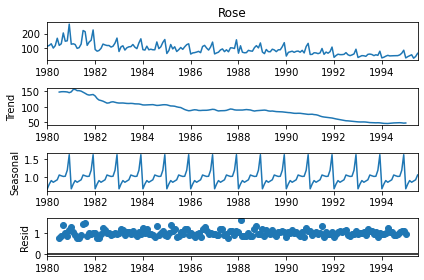

In [41]:
decomposition = seasonal_decompose(df_Rose,model='multiplicative')
decomposition.plot();

In [42]:
#decomposition = seasonal_decompose(df_Rose,model='additive')
#decomposition.plot();

In [43]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [44]:
deaseasonalized_ts = trend 
#deaseasonalized_ts.head(12)

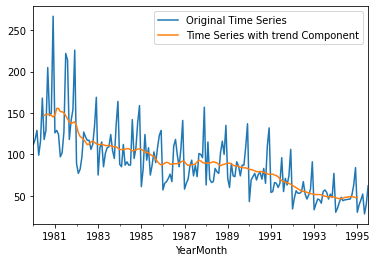

In [45]:
df_Rose.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series with trend Component"]);

In [46]:
deaseasonalized_ts = seasonality 
#deaseasonalized_ts.head(12)

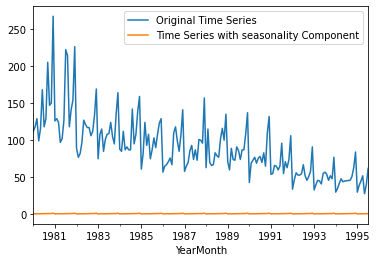

In [47]:
df_Rose.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series with seasonality Component"]);

In [48]:
deaseasonalized_ts = residual 
#deaseasonalized_ts.head(12)

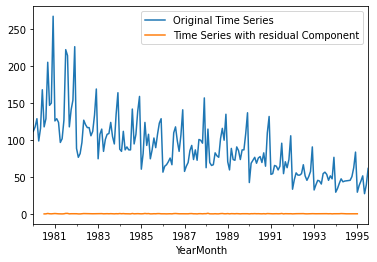

In [49]:
df_Rose.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series with residual Component"]);

In [50]:
df_Rose

YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
              ...  
1995-03-01     45.0
1995-04-01     52.0
1995-05-01     28.0
1995-06-01     40.0
1995-07-01     62.0
Name: Rose, Length: 187, dtype: float64

In [51]:
from sklearn.model_selection import TimeSeriesSplit

3. Split the data into training and test. The test data should start in 1991.

In [52]:
#df_train    =   df_Rose[0:int(len(df_Rose)*0.71)] 
#df_test     =   df_Rose[int(len(df_Rose)*0.71):]


df_train=df_Rose[df_Rose.index.year < 1991]
df_test=df_Rose[df_Rose.index.year >= 1991]

df_test.interpolate(axis=0, method='linear', inplace=True)

In [53]:
print(df_train.shape)
print(df_test.shape)

(132,)
(55,)


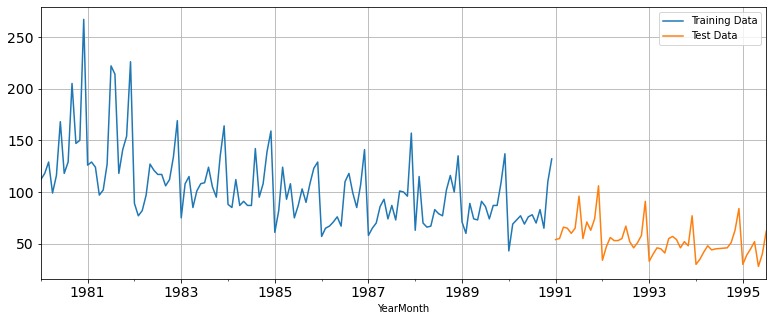

In [54]:
df_train.plot(figsize=(13,5), fontsize=14)
df_test.plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

# Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression

In [55]:
df_Rose2

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0


In [56]:
#train    =   df_Rose2[0:int(len(df_Rose2)*0.71)] 
#test     =   df_Rose2[int(len(df_Rose2)*0.71):]

#test.interpolate(axis=0, method='linear', inplace=True)

In [57]:
train=df_Rose2[df_Rose2.index.year < 1991]
test=df_Rose2[df_Rose2.index.year >= 1991]

test.interpolate(axis=0, method='linear', inplace=True)

<ipython-input-57-102b4359af1a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.interpolate(axis=0, method='linear', inplace=True)


In [58]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [59]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [60]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0    43
1991-02-01  55.0    44
1991-03-01  66.0    45
1991-04-01  65.0    46
1991-05-01  60.0    47 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0    93
1995-04-01  52.0    94
1995-05-01  28.0    95
1995-06-01  40.0    96
1995-07-01  62.0    97 



In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lr = LinearRegression()

In [63]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

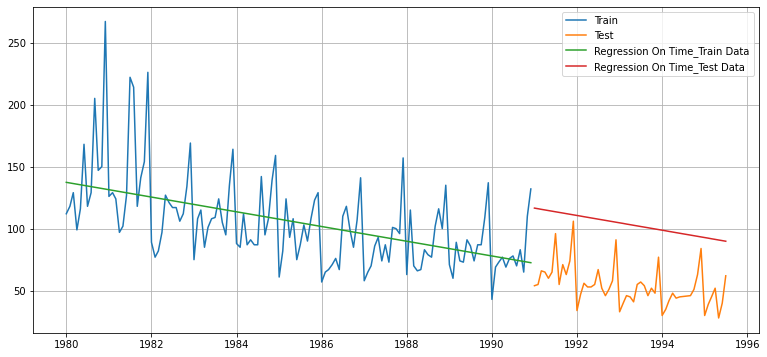

In [64]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Train Data')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [65]:
from sklearn import metrics

In [66]:
def MAPE(y, yhat):
    y, yhat = np.array(y),np.array(yhat)
    try:
        mape = round(np.sum(np.abs(yhat-y))/np.sum(y) * 100,2)
    except:
        print("Observed Values are empty")
        mape=np.nan
    return mape

In [67]:
import math
rmse = metrics.mean_squared_error(test['Rose'],test_predictions_model1)
math.sqrt(rmse)

51.433312028202415

In [68]:
## Train Data - RMSE and MAPE
rmse_model1_train = metrics.mean_squared_error(train['Rose'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Rose'],train_predictions_model1)
mape_model1_train

21.22

In [69]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 51.433


In [70]:
mape_model1_test = MAPE(test['Rose'],test_predictions_model1)
mape_model1_test

91.64

In [71]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.433312,91.64


## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

In [72]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [73]:
NaiveModel_train['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_train['naive'].head()

YearMonth
1980-01-01    132.0
1980-02-01    132.0
1980-03-01    132.0
1980-04-01    132.0
1980-05-01    132.0
Name: naive, dtype: float64

In [74]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

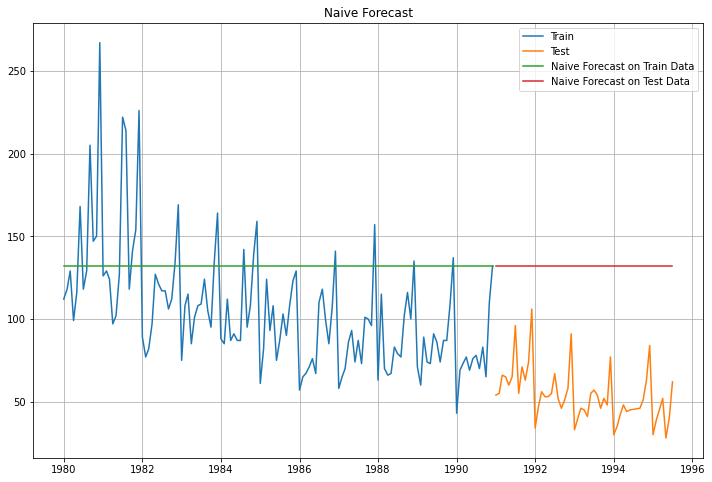

In [75]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Train Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [76]:
## Test Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['Rose'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Rose'],NaiveModel_train['naive'])
rmse_model2_train, mape_model2_train

(45.06375954403299, 36.38)

In [77]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Rose'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719


In [78]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.433312,91.64
NaiveModel,79.718773,145.10


## Method 3: Simple Average

In [79]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [80]:
SimpleAverage_train['mean_forecast'] = train['Rose'].mean()
SimpleAverage_train.head()

,Rose,mean_forecast
YearMonth,,
1980-01-01,112.0,104.939394
1980-02-01,118.0,104.939394
1980-03-01,129.0,104.939394
1980-04-01,99.0,104.939394
1980-05-01,116.0,104.939394


In [81]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


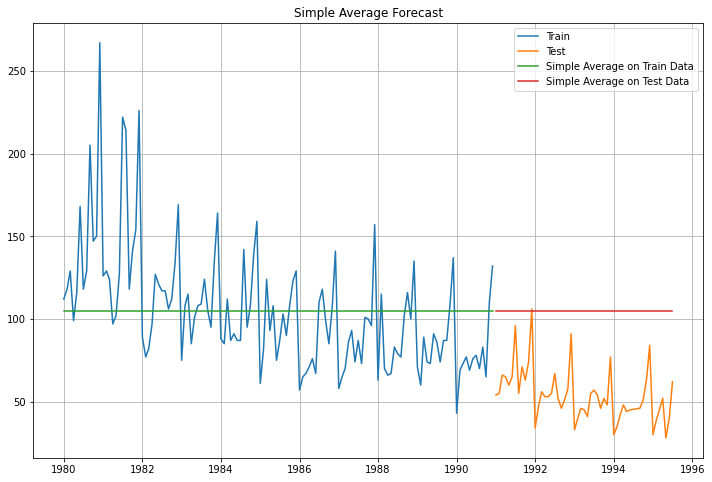

In [82]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Train Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [83]:
## Train and Test Data - RMSE  and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Rose'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Rose'],SimpleAverage_train['mean_forecast'])
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Rose'],SimpleAverage_test['mean_forecast'])


In [84]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.433312,91.64
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93


## Method 4: Moving Average(MA)

In [85]:
MovingAverage = df_Rose2.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [86]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


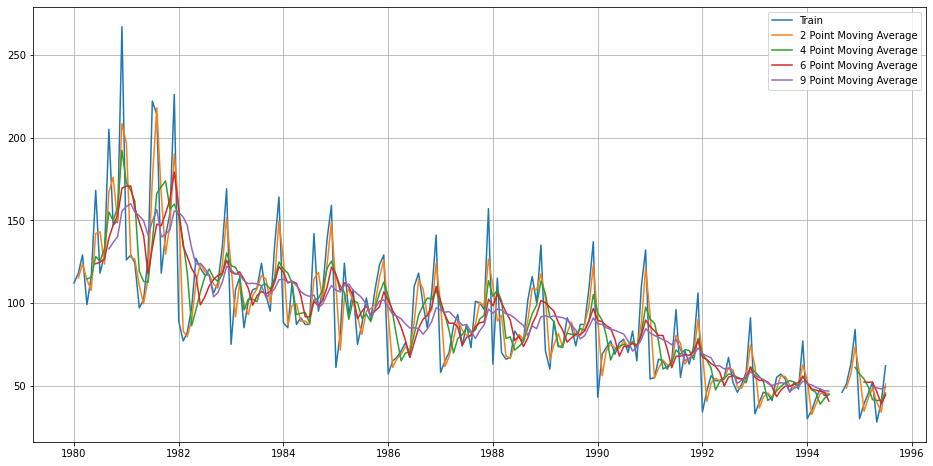

In [87]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [88]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

trailing_MovingAverage_test.interpolate(axis=0, method='linear', inplace=True)

<ipython-input-88-7b57738ca056>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trailing_MovingAverage_test.interpolate(axis=0, method='linear', inplace=True)


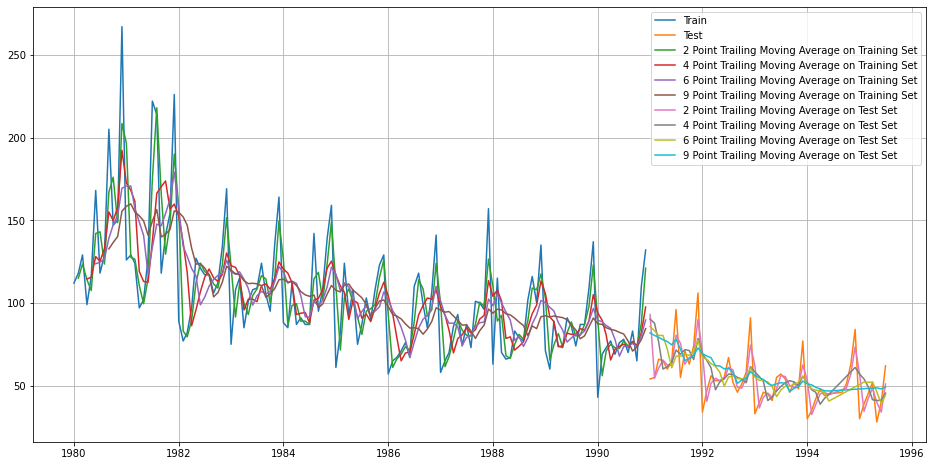

In [89]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [90]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2=MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA


rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4=MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA


rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6=MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA


rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9=MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.532
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.429
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.783
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.821 


In [91]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9],'Test MAPE': [mape_model4_test_2,mape_model4_test_4
                                          ,mape_model4_test_6,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.433312,91.64
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.531555,13.61
4pointTrailingMovingAverage,14.428913,19.68
6pointTrailingMovingAverage,14.783389,21.10
9pointTrailingMovingAverage,14.820724,20.95


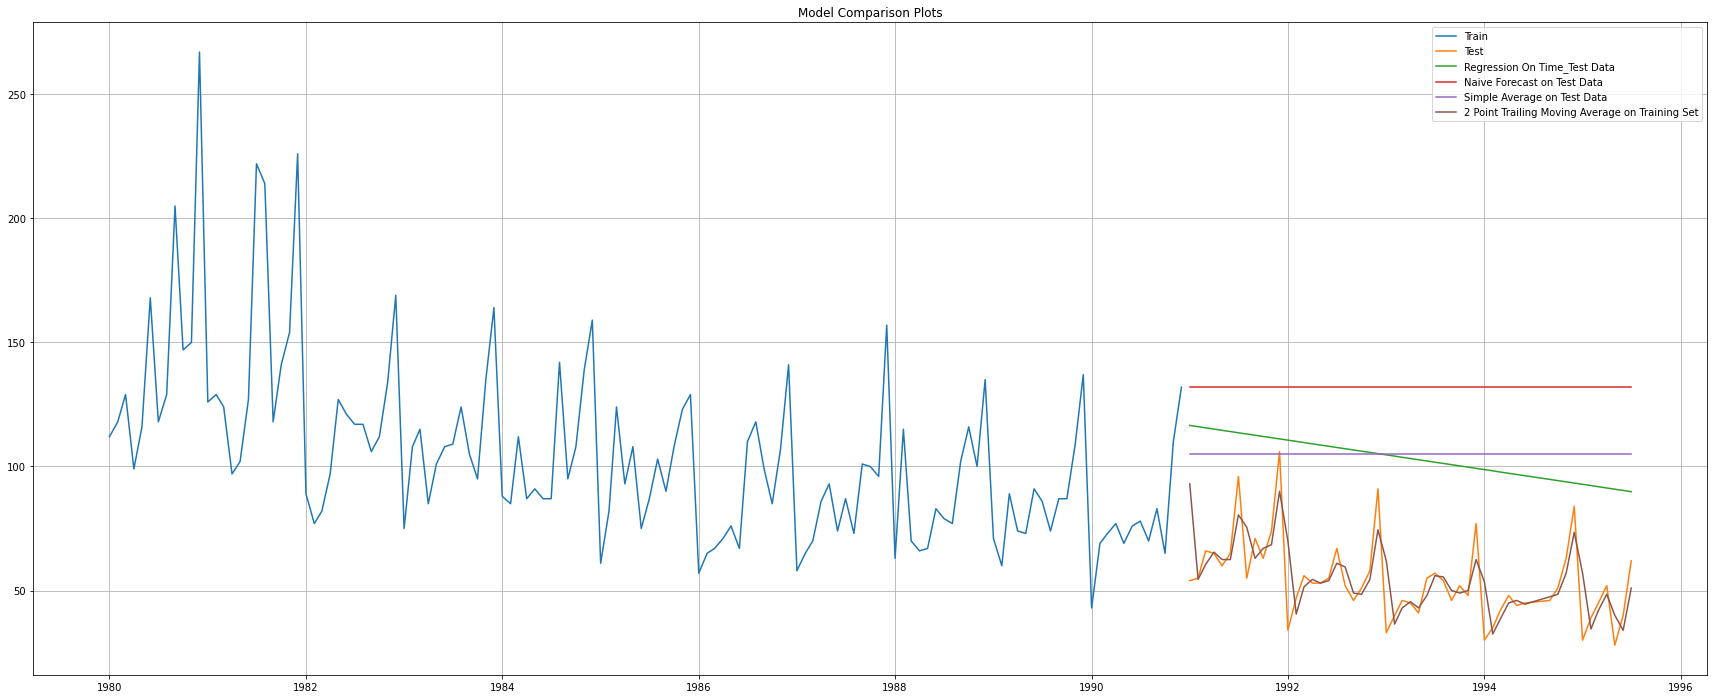

In [92]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Method 5: Simple Exponential Smoothing

In [93]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [94]:
SES_train = train.copy()
SES_test = test.copy()
SES_test.interpolate(axis=0, method='linear', inplace=True)

In [95]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [96]:
model_SES_autofit = model_SES.fit(optimized=True)

In [97]:
model_SES_autofit.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [98]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,predict
YearMonth,,
1991-01-01,54.0,87.104983
1991-02-01,55.0,87.104983
1991-03-01,66.0,87.104983
1991-04-01,65.0,87.104983
1991-05-01,60.0,87.104983


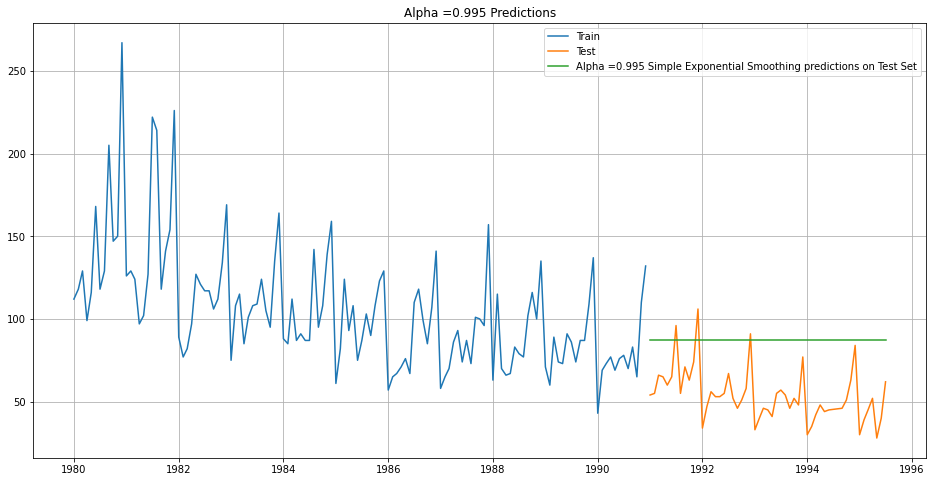

In [99]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [100]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test['Rose'],SES_test['predict'])
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.796


In [101]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.433312,91.64
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.531555,13.61
4pointTrailingMovingAverage,14.428913,19.68
6pointTrailingMovingAverage,14.783389,21.10
9pointTrailingMovingAverage,14.820724,20.95
"Alpha=0.995,SimpleExponentialSmoothing",36.796227,63.88


In [102]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[],'Test RMSE': [],'Test MAPE': []})
resultsDf_6

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [103]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=18)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train['Rose'],SES_train['predict',i])
    
    SES_test.interpolate(axis=0, method='linear', inplace=True)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test['Rose'],SES_test['predict',i])
    
    
    
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE':mape_model5_train_i
                                      ,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i }, ignore_index=True)

In [104]:
resultsDf_6.sort_values(by=['Test MAPE'])

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,31.815610,22.47,36.828033,63.94
1,0.2,31.979391,22.20,41.361876,72.21
2,0.3,32.470164,22.31,47.504821,83.71
3,0.4,33.035130,22.50,53.767406,95.50
4,0.5,33.682839,22.68,59.641786,106.81
5,0.6,34.441171,22.88,64.971288,117.04
6,0.7,35.323261,23.08,69.698162,126.07
7,0.8,36.334596,23.41,73.773992,133.83
8,0.9,37.482782,23.93,77.139276,140.22


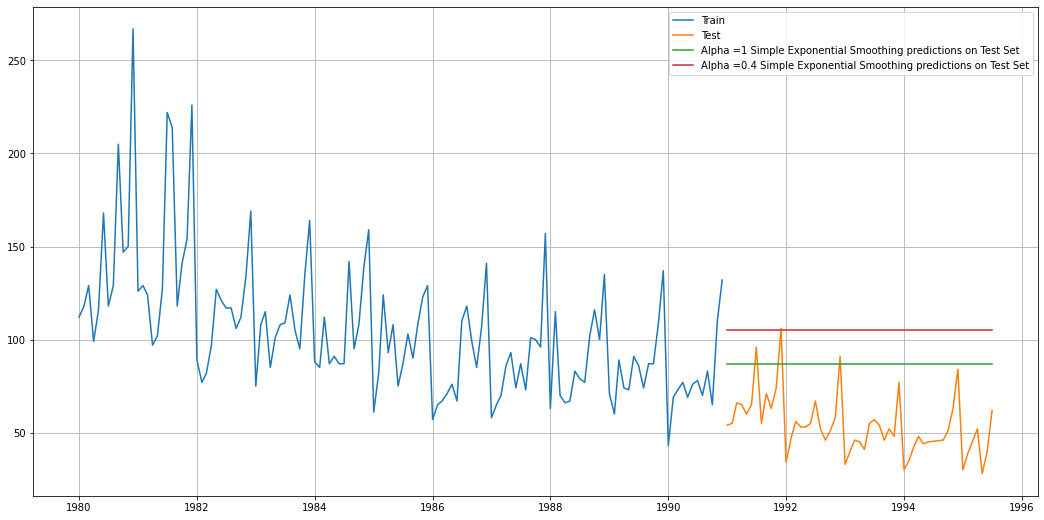

In [105]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [106]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][2],resultsDf_6['Test RMSE'][3]]
                             ,'Test MAPE': [resultsDf_6['Test MAPE'][2],resultsDf_6['Test MAPE'][3]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing','Alpha=0.4,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.433312,91.64
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.531555,13.61
4pointTrailingMovingAverage,14.428913,19.68
6pointTrailingMovingAverage,14.783389,21.10
9pointTrailingMovingAverage,14.820724,20.95
"Alpha=0.995,SimpleExponentialSmoothing",36.796227,63.88
"Alpha=0.3,SimpleExponentialSmoothing",47.504821,83.71
"Alpha=0.4,SimpleExponentialSmoothing",53.767406,95.50


## Method 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [107]:
DES_train = train.copy()
DES_test = test.copy()

In [108]:
model_DES = Holt(DES_train['Rose'])

C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [109]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[],'Test RMSE': [],'Test MAPE':[]})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [110]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=18)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train['Rose'],DES_train['predict',i,j])
        
        DES_test.interpolate(axis=0, method='linear', inplace=True)





        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test['Rose'],DES_test['predict',i,j])
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train, 'Train MAPE':mape_model6_train,
                                          'Test RMSE':rmse_model6_test,'Test MAPE':mape_model6_test}, ignore_index=True) 

In [111]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,35.944983,25.48,155.814991,278.16
1,0.3,0.4,37.393239,26.53,202.721137,361.52
2,0.3,0.5,38.888325,27.54,249.883670,445.29
3,0.3,0.6,40.280670,28.63,293.419750,522.67
4,0.3,0.7,41.403518,29.56,326.924544,582.33
...,...,...,...,...,...,...
59,1.0,0.6,51.831610,34.67,439.714533,785.76
60,1.0,0.7,54.497039,36.43,459.707307,821.10
61,1.0,0.8,57.365879,38.27,465.709856,831.71
62,1.0,0.9,60.474309,40.21,456.136698,814.79


In [112]:
resultsDf_7.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,35.944983,25.48,155.814991,278.16
8,0.4,0.3,36.749123,25.55,196.854246,352.24
1,0.3,0.4,37.393239,26.53,202.721137,361.52
16,0.5,0.3,37.433314,25.46,227.659362,407.83
9,0.4,0.4,38.004622,26.40,248.675281,444.26


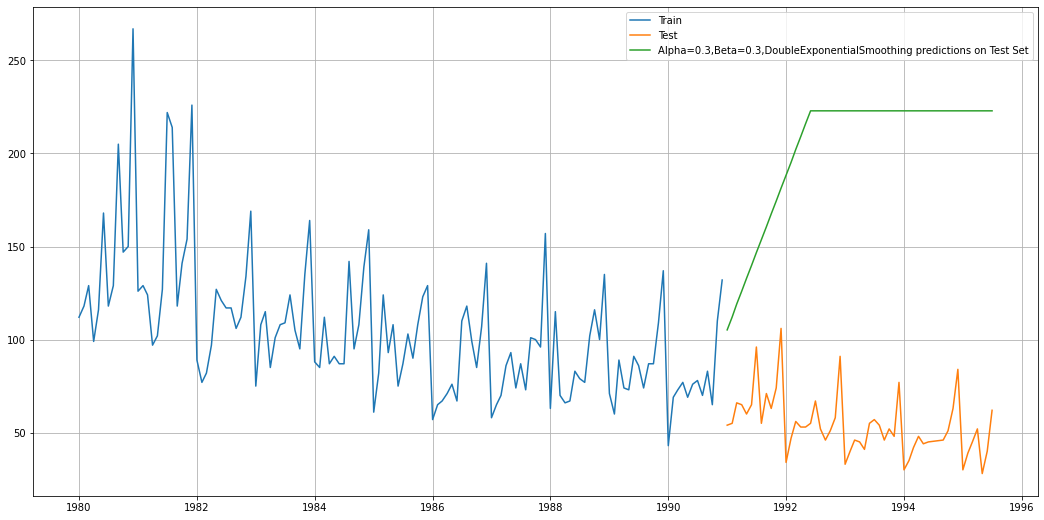

In [113]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [114]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7['Test RMSE'][0]],'Test MAPE': [resultsDf_7['Test MAPE'][0]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.433312,91.64
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.531555,13.61
4pointTrailingMovingAverage,14.428913,19.68
6pointTrailingMovingAverage,14.783389,21.10
9pointTrailingMovingAverage,14.820724,20.95
"Alpha=0.995,SimpleExponentialSmoothing",36.796227,63.88
"Alpha=0.3,SimpleExponentialSmoothing",47.504821,83.71
"Alpha=0.4,SimpleExponentialSmoothing",53.767406,95.50


## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [115]:
TS_Train = df_train.copy()
TS_Test = df_test.copy()

In [116]:

TS_Train_HW = ExponentialSmoothing(TS_Train,seasonal='multiplicative',trend='additive',seasonal_periods=12)
TS_Train_HW_autofit = TS_Train_HW.fit(optimized=True)



C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [117]:


TS_Train_HW_autofit.params_formatted


,name,param,optimized
smoothing_level,alpha,0.065694,True
smoothing_trend,beta,0.051929,True
smoothing_seasonal,gamma,0.000004,True
initial_level,l.0,54.109855,True
initial_trend,b.0,-0.334720,True
initial_seasons.0,s.0,2.082823,True
initial_seasons.1,s.1,2.363267,True
initial_seasons.2,s.2,2.582102,True
initial_seasons.3,s.3,2.257027,True
initial_seasons.4,s.4,2.537575,True


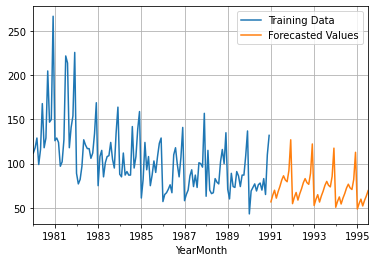

In [118]:

TES_pred = TS_Train_HW_autofit.forecast(steps=len(TS_Test))
TS_Train.plot()
TES_pred.plot()
plt.grid()
plt.legend(['Training Data','Forecasted Values']);


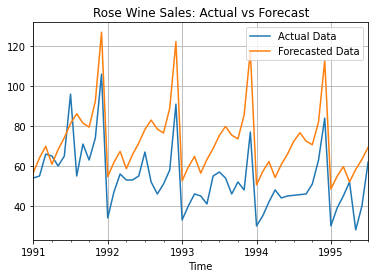

In [119]:

## Plotting only the forecast and the test data
TS_Test.plot()
TES_pred.plot()
plt.grid()
plt.title('Rose Wine Sales: Actual vs Forecast')
plt.xlabel('Time')
plt.legend(['Actual Data','Forecasted Data']);



In [120]:
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.433312,91.64
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.531555,13.61
4pointTrailingMovingAverage,14.428913,19.68
6pointTrailingMovingAverage,14.783389,21.10
9pointTrailingMovingAverage,14.820724,20.95
"Alpha=0.995,SimpleExponentialSmoothing",36.796227,63.88
"Alpha=0.3,SimpleExponentialSmoothing",47.504821,83.71
"Alpha=0.4,SimpleExponentialSmoothing",53.767406,95.50


In [121]:








## Mean Absolute Percentage Error (MAPE) - Function Definition
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100
RMSE = mean_squared_error(TS_Test,TES_pred,squared=False)
MAPE = mean_absolute_percentage_error(TS_Test,TES_pred)
resultsDf_8 = pd.DataFrame({'Test RMSE': [RMSE],'Test MAPE':[MAPE]},index=['TripleExponentialSmoothing'])
resultsDf_8

,Test RMSE,Test MAPE
TripleExponentialSmoothing,21.01962,38.7431


In [122]:
resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.433312,91.6400
NaiveModel,79.718773,145.1000
SimpleAverageModel,53.460570,94.9300
2pointTrailingMovingAverage,11.531555,13.6100
4pointTrailingMovingAverage,14.428913,19.6800
6pointTrailingMovingAverage,14.783389,21.1000
9pointTrailingMovingAverage,14.820724,20.9500
"Alpha=0.995,SimpleExponentialSmoothing",36.796227,63.8800
"Alpha=0.3,SimpleExponentialSmoothing",47.504821,83.7100
"Alpha=0.4,SimpleExponentialSmoothing",53.767406,95.5000


5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

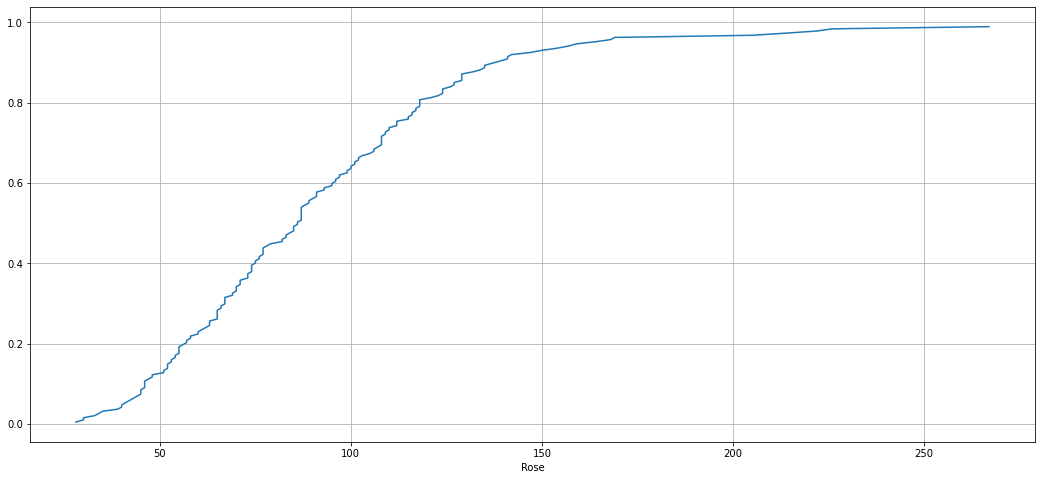

In [123]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df_Rose2['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Rose');

## Plot the average Sales per month and the month on month percentage change of Sales.

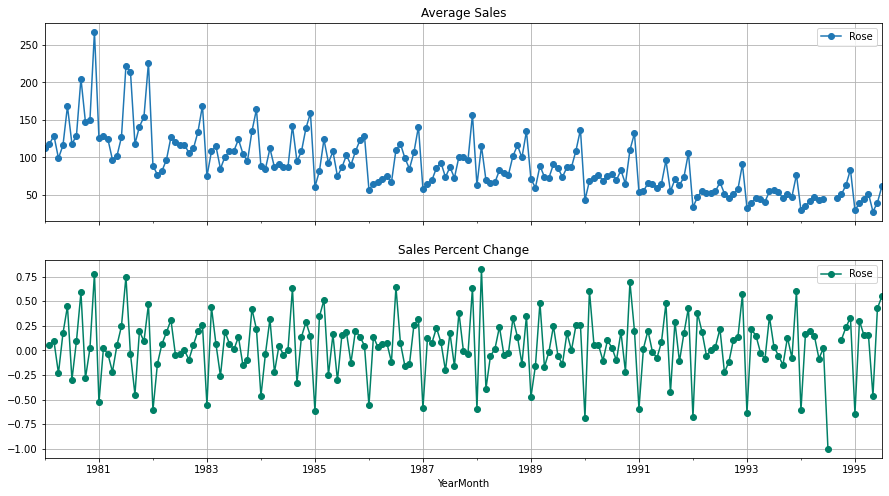

In [124]:
# group by date and get average RetailSales, and precent change
average    = df_Rose2.groupby(df_Rose2.index)["Rose"].mean()
pct_change = df_Rose2.groupby(df_Rose2.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

## Check for stationarity of the whole Time Series data.

In [125]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

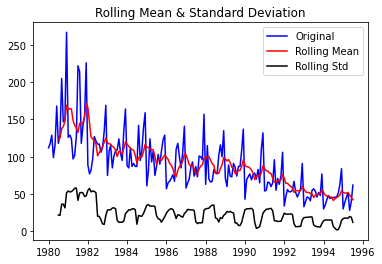

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [126]:
test_stationarity(df_Rose)

We see that at 5% significant level the Time Series is non-stationary.

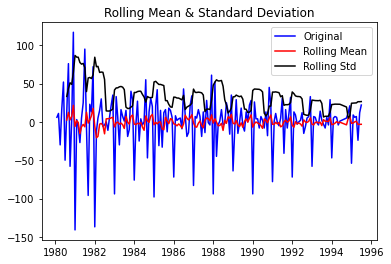

Results of Dickey-Fuller Test:
Test Statistic                -7.966534e+00
p-value                        2.855044e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.700000e+02
Critical Value (1%)           -3.469413e+00
Critical Value (5%)           -2.878696e+00
Critical Value (10%)          -2.575917e+00
dtype: float64 



In [127]:
test_stationarity(df_Rose2['Rose'].diff().dropna())

We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

In [128]:
import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 5)
Model: (0, 0, 1)(0, 0, 2, 5)
Model: (0, 0, 2)(1, 0, 0, 5)
Model: (0, 0, 2)(1, 0, 1, 5)


6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [129]:
train=df_Rose2[df_Rose2.index.year < 1991]
test=df_Rose2[df_Rose2.index.year >= 1991]

In [130]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [131]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Last few rows of Training Data


,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


First few rows of Test Data


,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


Last few rows of Test Data


,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [132]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


## Check for stationarity of the Training Data Time Series.

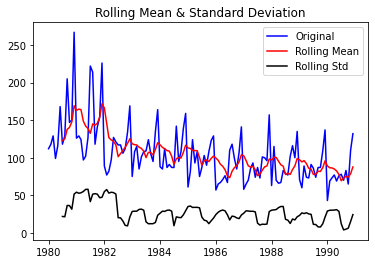

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [133]:
test_stationarity(train['Rose'])

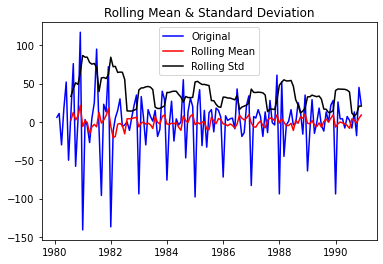

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [134]:
test_stationarity(train['Rose'].diff().dropna())

In [135]:
# Creating an empty Dataframe with column names only
dfObj = pd.DataFrame(columns=['param', 'AIC'])
dfObj

,param,AIC


In [136]:
## Let's start by building ARIMA model -- Although the data set has some seasonality and hence ARIMA is 
## not the right option Reason for making the model is to understand how different the model could be if seasonality is not considered

from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
            try:
                mod = ARIMA(train['Rose'], order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj = dfObj.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 0, 0) - AIC:1324.8997029577333
ARIMA(0, 0, 1) - AIC:1305.4684057684567


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M

ARIMA(0, 0, 2) - AIC:1306.5866794770002
ARIMA(1, 0, 0) - AIC:1301.5463044353048


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1) - AIC:1294.510585181333


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M

ARIMA(1, 0, 2) - AIC:1292.0532102469483
ARIMA(2, 0, 0) - AIC:1302.3460741769325


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M

ARIMA(2, 0, 1) - AIC:1292.9371945618595


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M

ARIMA(2, 0, 2) - AIC:1292.2480553310668


In [137]:
dfObj.sort_values(by=['AIC'])

,param,AIC
5,"(1, 0, 2)",1292.053210
8,"(2, 0, 2)",1292.248055
7,"(2, 0, 1)",1292.937195
4,"(1, 0, 1)",1294.510585
3,"(1, 0, 0)",1301.546304
6,"(2, 0, 0)",1302.346074
1,"(0, 0, 1)",1305.468406
2,"(0, 0, 2)",1306.586679
0,"(0, 0, 0)",1324.899703


In [138]:
## ARIMA(1,0,2) has the lowest AIC
mod = ARIMA(train['Rose'], order=(1,0,2))

results_Arima = mod.fit()

print(results_Arima.summary())

C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M

                              ARMA Model Results                              
Dep. Variable:                   Rose   No. Observations:                  132
Model:                     ARMA(1, 2)   Log Likelihood                -641.027
Method:                       css-mle   S.D. of innovations             30.999
Date:                Sun, 07 Nov 2021   AIC                           1292.053
Time:                        16:46:37   BIC                           1306.467
Sample:                    01-01-1980   HQIC                          1297.910
                         - 12-01-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.8488     15.807      6.823      0.000      76.867     138.830
ar.L1.Rose     0.9861      0.018     53.660      0.000       0.950       1.022
ma.L1.Rose    -0.6873      0.098     -6.989      0.0

In [139]:
test.interpolate(axis=0, method='linear', inplace=True)
final_hat_avg =test.copy()

pred_ARIMA = results_Arima.forecast(steps=len(test))
pred_ARIMA[0]

<ipython-input-139-c3f3b2b85182>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.interpolate(axis=0, method='linear', inplace=True)


array([98.71425229, 91.01343833, 91.24718203, 91.47768042, 91.70497856,
       91.92912087, 92.15015118, 92.36811269, 92.58304801, 92.79499916,
       93.00400756, 93.21011407, 93.41335899, 93.61378205, 93.81142242,
       94.00631873, 94.1985091 , 94.38803108, 94.57492172, 94.75921757,
       94.94095464, 95.12016846, 95.29689407, 95.471166  , 95.64301833,
       95.81248466, 95.9795981 , 96.14439133, 96.30689656, 96.46714556,
       96.62516965, 96.78099973, 96.93466625, 97.08619925, 97.23562836,
       97.38298279, 97.52829134, 97.67158241, 97.81288403, 97.9522238 ,
       98.08962897, 98.2251264 , 98.35874258, 98.49050362, 98.62043528,
       98.74856296, 98.87491171, 98.99950622, 99.12237086, 99.24352964,
       99.36300624, 99.48082402, 99.59700601, 99.71157492, 99.82455315])

In [140]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(test.Rose,pred_ARIMA[0]))
print(rmse)

45.450517057378356


In [141]:
resultsDf_9 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(1, 0, 2)'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf


,Test RMSE,Test MAPE
RegressionOnTime,51.433312,91.6400
NaiveModel,79.718773,145.1000
SimpleAverageModel,53.460570,94.9300
2pointTrailingMovingAverage,11.531555,13.6100
4pointTrailingMovingAverage,14.428913,19.6800
6pointTrailingMovingAverage,14.783389,21.1000
9pointTrailingMovingAverage,14.820724,20.9500
"Alpha=0.995,SimpleExponentialSmoothing",36.796227,63.8800
"Alpha=0.3,SimpleExponentialSmoothing",47.504821,83.7100
"Alpha=0.4,SimpleExponentialSmoothing",53.767406,95.5000


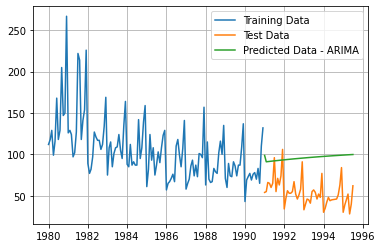

In [142]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

# Build an SARIMA model.

In [143]:


### As the dataset has seasonality.. Let's build the model with SARIMA
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2


,param,seasonal,AIC


In [144]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train['Rose'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

SARIMA(0, 0, 0)x(0, 0, 0, 5)7 - AIC:1607.5307543879908
SARIMA(0, 0, 0)x(0, 0, 1, 5)7 - AIC:1453.7019415527911
SARIMA(0, 0, 0)x(0, 0, 2, 5)7 - AIC:1346.8085541177168
SARIMA(0, 0, 0)x(1, 0, 0, 5)7 - AIC:1326.0913916364734


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 0)x(1, 0, 1, 5)7 - AIC:1239.608706973624


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 0)x(1, 0, 2, 5)7 - AIC:1191.3074957447977
SARIMA(0, 0, 0)x(2, 0, 0, 5)7 - AIC:1233.3792414384438


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 0)x(2, 0, 1, 5)7 - AIC:1199.2423565485965


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 0)x(2, 0, 2, 5)7 - AIC:1181.6187567542745
SARIMA(0, 0, 1)x(0, 0, 0, 5)7 - AIC:1481.8198652085207


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(0, 0, 1, 5)7 - AIC:1380.9872015494282


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(0, 0, 2, 5)7 - AIC:1275.16453324346
SARIMA(0, 0, 1)x(1, 0, 0, 5)7 - AIC:1314.2963371065373


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(1, 0, 1, 5)7 - AIC:1227.6924331460768


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(1, 0, 2, 5)7 - AIC:1180.3587715547378


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(2, 0, 0, 5)7 - AIC:1227.7797497037473


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(2, 0, 1, 5)7 - AIC:1198.0962605255895


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(2, 0, 2, 5)7 - AIC:1162.158654670482


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(0, 0, 0, 5)7 - AIC:1426.844549732658


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(0, 0, 1, 5)7 - AIC:1330.33824123506


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(0, 0, 2, 5)7 - AIC:1250.3124639495088


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(1, 0, 0, 5)7 - AIC:1316.2937895986


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(1, 0, 1, 5)7 - AIC:1219.738687611045


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(1, 0, 2, 5)7 - AIC:1172.5165126489974


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(2, 0, 0, 5)7 - AIC:1221.726564567236


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(2, 0, 1, 5)7 - AIC:1198.8480058856903


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)x(2, 0, 2, 5)7 - AIC:1155.1754225592642
SARIMA(1, 0, 0)x(0, 0, 0, 5)7 - AIC:1331.2484844349851
SARIMA(1, 0, 0)x(0, 0, 1, 5)7 - AIC:1283.3695757467337


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

SARIMA(1, 0, 0)x(0, 0, 2, 5)7 - AIC:1229.6024967780538
SARIMA(1, 0, 0)x(1, 0, 0, 5)7 - AIC:1283.6697273696714


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(1, 0, 1, 5)7 - AIC:1237.457319381272


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(1, 0, 2, 5)7 - AIC:1190.3229112249835


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(2, 0, 0, 5)7 - AIC:1222.1989846287445


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(2, 0, 1, 5)7 - AIC:1189.309277234626


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(2, 0, 2, 5)7 - AIC:1180.17637726587


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(0, 0, 0, 5)7 - AIC:1268.4267546014516


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(0, 0, 1, 5)7 - AIC:1221.1873945025818


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No fre

SARIMA(1, 0, 1)x(0, 0, 2, 5)7 - AIC:1174.8650842531456
SARIMA(1, 0, 1)x(1, 0, 0, 5)7 - AIC:1229.6101359198287


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No fre

SARIMA(1, 0, 1)x(1, 0, 1, 5)7 - AIC:1227.092449497572


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(1, 0, 2, 5)7 - AIC:1174.4929184439293


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(2, 0, 0, 5)7 - AIC:1184.1015550306486


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(2, 0, 1, 5)7 - AIC:1175.7660763419499


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(2, 0, 2, 5)7 - AIC:1166.0325331228453
SARIMA(1, 0, 2)x(0, 0, 0, 5)7 - AIC:1258.7656242392713


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)x(0, 0, 1, 5)7 - AIC:1210.5814637264039


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)x(0, 0, 2, 5)7 - AIC:1141.2980953610772


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)x(1, 0, 0, 5)7 - AIC:1231.3182969172499


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No fre

SARIMA(1, 0, 2)x(1, 0, 1, 5)7 - AIC:1216.5822821300162


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)x(1, 0, 2, 5)7 - AIC:1149.7430933717578


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)x(2, 0, 0, 5)7 - AIC:1181.417815772274


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)x(2, 0, 1, 5)7 - AIC:1181.0772856821836


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No fre

SARIMA(1, 0, 2)x(2, 0, 2, 5)7 - AIC:1150.9151001678952
SARIMA(2, 0, 0)x(0, 0, 0, 5)7 - AIC:1308.2736030498359


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)x(0, 0, 1, 5)7 - AIC:1270.4631670465913
SARIMA(2, 0, 0)x(0, 0, 2, 5)7 - AIC:1213.4537936116467


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)x(1, 0, 0, 5)7 - AIC:1261.0339817854444


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)x(1, 0, 1, 5)7 - AIC:1229.5499197763443


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)x(1, 0, 2, 5)7 - AIC:1213.2448700469115


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)x(2, 0, 0, 5)7 - AIC:1185.7937010504884


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)x(2, 0, 1, 5)7 - AIC:1200.2168374239614


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)x(2, 0, 2, 5)7 - AIC:1163.7305214179398


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)x(0, 0, 0, 5)7 - AIC:1266.3761680272805


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No fre

SARIMA(2, 0, 1)x(0, 0, 1, 5)7 - AIC:1220.9833360479067


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)x(0, 0, 2, 5)7 - AIC:1176.418813406131
SARIMA(2, 0, 1)x(1, 0, 0, 5)7 - AIC:1220.6972309851944


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No fre

SARIMA(2, 0, 1)x(1, 0, 1, 5)7 - AIC:1228.5231418719495
SARIMA(2, 0, 1)x(1, 0, 2, 5)7 - AIC:1173.1597252054257


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)x(2, 0, 0, 5)7 - AIC:1176.4966804823025


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No fre

SARIMA(2, 0, 1)x(2, 0, 1, 5)7 - AIC:1173.312921320026


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)x(2, 0, 2, 5)7 - AIC:1173.1247649470447


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)x(0, 0, 0, 5)7 - AIC:1258.6801784572524


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)x(0, 0, 1, 5)7 - AIC:1210.9138654227033


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)x(0, 0, 2, 5)7 - AIC:1150.498512403914


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)x(1, 0, 0, 5)7 - AIC:1218.8907654260731


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)x(1, 0, 1, 5)7 - AIC:1217.5162673566217


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)x(1, 0, 2, 5)7 - AIC:1151.4556908089373
SARIMA(2, 0, 2)x(2, 0, 0, 5)7 - AIC:1186.4680364945252


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No fre

SARIMA(2, 0, 2)x(2, 0, 1, 5)7 - AIC:1161.3715064682215
SARIMA(2, 0, 2)x(2, 0, 2, 5)7 - AIC:1151.8953537660527


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [145]:
dfObj2.sort_values(by=['AIC'])

,param,seasonal,AIC
47,"(1, 0, 2)","(0, 0, 2, 5)",1141.298095
50,"(1, 0, 2)","(1, 0, 2, 5)",1149.743093
74,"(2, 0, 2)","(0, 0, 2, 5)",1150.498512
53,"(1, 0, 2)","(2, 0, 2, 5)",1150.915100
77,"(2, 0, 2)","(1, 0, 2, 5)",1151.455691
...,...,...,...
10,"(0, 0, 1)","(0, 0, 1, 5)",1380.987202
18,"(0, 0, 2)","(0, 0, 0, 5)",1426.844550
1,"(0, 0, 0)","(0, 0, 1, 5)",1453.701942
9,"(0, 0, 1)","(0, 0, 0, 5)",1481.819865


In [146]:
## SARIMA(1,0,2)(0,0,2,5) - AIC:6914.849775
mod = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(1,0,2),
                                seasonal_order=(0,0,2,5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 5)   Log Likelihood                -564.649
Date:                           Sun, 07 Nov 2021   AIC                           1141.298
Time:                                   16:47:28   BIC                           1157.973
Sample:                               01-01-1980   HQIC                          1148.069
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9955      0.001    908.989      0.000       0.993       0.998
ma.L1         -0.7507      0.116     -6.460

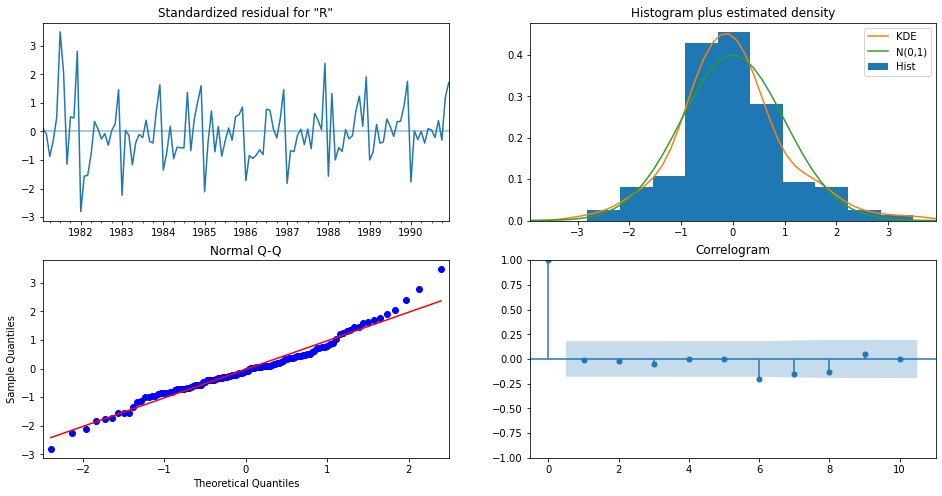

In [147]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [148]:
final_hat_avg =test.copy()
pred_SARIMA = results.get_forecast(steps=len(test))
pred_SARIMA.predicted_mean

1991-01-01    87.742133
1991-02-01    75.995179
1991-03-01    75.736688
1991-04-01    76.294173
1991-05-01    77.045934
1991-06-01    75.136955
1991-07-01    72.870096
1991-08-01    73.884962
1991-09-01    70.208840
1991-10-01    67.632422
1991-11-01    71.268373
1991-12-01    72.012598
1992-01-01    71.689063
1992-02-01    71.366981
1992-03-01    71.046346
1992-04-01    70.727152
1992-05-01    70.409392
1992-06-01    70.093059
1992-07-01    69.778148
1992-08-01    69.464652
1992-09-01    69.152563
1992-10-01    68.841878
1992-11-01    68.532587
1992-12-01    68.224687
1993-01-01    67.918170
1993-02-01    67.613030
1993-03-01    67.309260
1993-04-01    67.006856
1993-05-01    66.705810
1993-06-01    66.406117
1993-07-01    66.107770
1993-08-01    65.810764
1993-09-01    65.515092
1993-10-01    65.220748
1993-11-01    64.927727
1993-12-01    64.636022
1994-01-01    64.345628
1994-02-01    64.056538
1994-03-01    63.768748
1994-04-01    63.482250
1994-05-01    63.197039
1994-06-01    62

In [149]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test.Rose,pred_SARIMA.predicted_mean))
print(rmse)

20.055333345751894


In [150]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['SARIMA(1, 0, 2)(0, 0, 2)5'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.433312,91.6400
NaiveModel,79.718773,145.1000
SimpleAverageModel,53.460570,94.9300
2pointTrailingMovingAverage,11.531555,13.6100
4pointTrailingMovingAverage,14.428913,19.6800
6pointTrailingMovingAverage,14.783389,21.1000
9pointTrailingMovingAverage,14.820724,20.9500
"Alpha=0.995,SimpleExponentialSmoothing",36.796227,63.8800
"Alpha=0.3,SimpleExponentialSmoothing",47.504821,83.7100
"Alpha=0.4,SimpleExponentialSmoothing",53.767406,95.5000


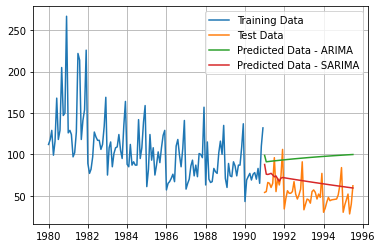

In [151]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

# Build a SARIMAX model.

In [152]:
### Let's create exogeneous variables

ex_train=train[['Rose']]
ex_test=test[['Rose']]
ex_train.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [153]:
dfObj3 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj3

,param,seasonal,AIC


In [154]:
## Let's first use SARIMAX with exogenous variable 
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train['Rose'],exog=ex_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMAX = mod.fit()
        print('SARIMA{}{} - AIC:{}'.format(param, param_seasonal, results_SARIMAX.aic))
        dfObj3 = dfObj3.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No fre

SARIMA(0, 0, 0)(0, 0, 0, 5) - AIC:-2771.624576122576
SARIMA(0, 0, 0)(0, 0, 1, 5) - AIC:-2663.6847068049206


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No fre

SARIMA(0, 0, 0)(0, 0, 2, 5) - AIC:-2555.7448374872647
SARIMA(0, 0, 0)(1, 0, 0, 5) - AIC:-2684.8726806684517


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No fre

SARIMA(0, 0, 0)(1, 0, 1, 5) - AIC:-2661.6847068049206


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 0)(1, 0, 2, 5) - AIC:-2553.7448374872647


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 0)(2, 0, 0, 5) - AIC:-2576.932811350796


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No

SARIMA(0, 0, 0)(2, 0, 1, 5) - AIC:-2574.932811350796
SARIMA(0, 0, 0)(2, 0, 2, 5) - AIC:-2551.7448374872647


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)(0, 0, 0, 5) - AIC:-2748.436602259045


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)(0, 0, 1, 5) - AIC:-2640.4967329413894


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)(0, 0, 2, 5) - AIC:-2532.5568636237335
SARIMA(0, 0, 1)(1, 0, 0, 5) - AIC:-2682.8726806684517


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No fre

SARIMA(0, 0, 1)(1, 0, 1, 5) - AIC:-2638.4967329413894


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)(1, 0, 2, 5) - AIC:-2530.5568636237335


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)(2, 0, 0, 5) - AIC:-2574.932811350796


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)(2, 0, 1, 5) - AIC:-2572.932811350796


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)(2, 0, 2, 5) - AIC:-2528.5568636237335


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)(0, 0, 0, 5) - AIC:-2725.2486283955136


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)(0, 0, 1, 5) - AIC:-2617.308759077858


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)(0, 0, 2, 5) - AIC:-2509.368889760203


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)(1, 0, 0, 5) - AIC:-2680.8726806684517


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)(1, 0, 1, 5) - AIC:-2615.308759077858


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)(1, 0, 2, 5) - AIC:-2507.368889760203


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)(2, 0, 0, 5) - AIC:-2572.932811350796


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 2)(2, 0, 1, 5) - AIC:-2570.932811350796


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 2)(2, 0, 2, 5) - AIC:-2505.368889760203
SARIMA(1, 0, 0)(0, 0, 0, 5) - AIC:-2769.624576122576


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 0)(0, 0, 1, 5) - AIC:-2661.6847068049206


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No fre

SARIMA(1, 0, 0)(0, 0, 2, 5) - AIC:-2553.7448374872647


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)(1, 0, 0, 5) - AIC:-2661.6847068049206


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)(1, 0, 1, 5) - AIC:-2659.6847068049206


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)(1, 0, 2, 5) - AIC:-2551.7448374872647


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)(2, 0, 0, 5) - AIC:-2553.7448374872647


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)(2, 0, 1, 5) - AIC:-2551.7448374872647


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)(2, 0, 2, 5) - AIC:-2549.7448374872647


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)(0, 0, 0, 5) - AIC:-2746.436602259045


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)(0, 0, 1, 5) - AIC:-2638.4967329413894


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)(0, 0, 2, 5) - AIC:-2530.5568636237335


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)(1, 0, 0, 5) - AIC:-2659.6847068049206


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)(1, 0, 1, 5) - AIC:-2636.4967329413894


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)(1, 0, 2, 5) - AIC:-2528.5568636237335


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)(2, 0, 0, 5) - AIC:-2551.7448374872647


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)(2, 0, 1, 5) - AIC:-2549.7448374872647


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)(2, 0, 2, 5) - AIC:-2526.5568636237335


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)(0, 0, 0, 5) - AIC:-2723.2486283955136


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)(0, 0, 1, 5) - AIC:-2615.308759077858


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)(0, 0, 2, 5) - AIC:-2507.368889760203


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)(1, 0, 0, 5) - AIC:-2657.6847068049206


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)(1, 0, 1, 5) - AIC:-2613.308759077858


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)(1, 0, 2, 5) - AIC:-2505.368889760203


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)(2, 0, 0, 5) - AIC:-2549.7448374872647


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)(2, 0, 1, 5) - AIC:-2547.7448374872647


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 2)(2, 0, 2, 5) - AIC:-2503.368889760203


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)(0, 0, 0, 5) - AIC:-2746.436602259045


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)(0, 0, 1, 5) - AIC:-2659.6847068049206


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)(0, 0, 2, 5) - AIC:-2551.7448374872647


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)(1, 0, 0, 5) - AIC:-2638.4967329413894


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)(1, 0, 1, 5) - AIC:-2636.4967329413894


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)(1, 0, 2, 5) - AIC:-2549.7448374872647


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)(2, 0, 0, 5) - AIC:-2530.5568636237335


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)(2, 0, 1, 5) - AIC:-2528.5568636237335


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 0)(2, 0, 2, 5) - AIC:-2526.5568636237335


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)(0, 0, 0, 5) - AIC:-2744.436602259045


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)(0, 0, 1, 5) - AIC:-2636.4967329413894


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)(0, 0, 2, 5) - AIC:-2528.5568636237335


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)(1, 0, 0, 5) - AIC:-2636.4967329413894


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)(1, 0, 1, 5) - AIC:-2634.4967329413894


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)(1, 0, 2, 5) - AIC:-2526.5568636237335


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)(2, 0, 0, 5) - AIC:-2528.5568636237335


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)(2, 0, 1, 5) - AIC:-2526.5568636237335


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 1)(2, 0, 2, 5) - AIC:-2524.5568636237335


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)(0, 0, 0, 5) - AIC:-2721.2486283955136


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)(0, 0, 1, 5) - AIC:-2613.308759077858


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)(0, 0, 2, 5) - AIC:-2505.368889760203


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)(1, 0, 0, 5) - AIC:-2634.4967329413894


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)(1, 0, 1, 5) - AIC:-2611.308759077858


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)(1, 0, 2, 5) - AIC:-2503.368889760203


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)(2, 0, 0, 5) - AIC:-2526.5568636237335


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


SARIMA(2, 0, 2)(2, 0, 1, 5) - AIC:-2524.5568636237335
SARIMA(2, 0, 2)(2, 0, 2, 5) - AIC:-2501.368889760203


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [155]:
dfObj3.sort_values(by=['AIC'])

,param,seasonal,AIC
0,"(0, 0, 0)","(0, 0, 0, 5)",-2771.624576
27,"(1, 0, 0)","(0, 0, 0, 5)",-2769.624576
9,"(0, 0, 1)","(0, 0, 0, 5)",-2748.436602
36,"(1, 0, 1)","(0, 0, 0, 5)",-2746.436602
54,"(2, 0, 0)","(0, 0, 0, 5)",-2746.436602
...,...,...,...
74,"(2, 0, 2)","(0, 0, 2, 5)",-2505.368890
26,"(0, 0, 2)","(2, 0, 2, 5)",-2505.368890
53,"(1, 0, 2)","(2, 0, 2, 5)",-2503.368890
77,"(2, 0, 2)","(1, 0, 2, 5)",-2503.368890


In [156]:
## SARIMAX(1, 0, 2)(0, 0, 2, 5)
mod = sm.tsa.statespace.SARIMAX(train['Rose'],exog=ex_train,
                                order=(1 ,0,2),
                                seasonal_order=(0,0,2,5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 5)   Log Likelihood                1260.684
Date:                           Sun, 07 Nov 2021   AIC                          -2507.369
Time:                                   16:47:58   BIC                          -2487.915
Sample:                               01-01-1980   HQIC                         -2499.469
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Rose           1.0000         -0       -inf      0.000       1.000       1.000
ar.L1               0         -0        nan

C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2937: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2937: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3108: RuntimeWarning: invalid value encountered in double_scalars
  test_statistic = np.sum(numer_resid) / np.sum(denom_resid)
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:677: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


In [157]:
pred_SARIMAX = results.get_forecast(steps=len(test),exog=ex_test)
pred_SARIMAX.predicted_mean

1991-01-01     54.000000
1991-02-01     55.000000
1991-03-01     66.000000
1991-04-01     65.000000
1991-05-01     60.000000
1991-06-01     65.000000
1991-07-01     96.000000
1991-08-01     55.000000
1991-09-01     71.000000
1991-10-01     63.000000
1991-11-01     74.000000
1991-12-01    106.000000
1992-01-01     34.000000
1992-02-01     47.000000
1992-03-01     56.000000
1992-04-01     53.000000
1992-05-01     53.000000
1992-06-01     55.000000
1992-07-01     67.000000
1992-08-01     52.000000
1992-09-01     46.000000
1992-10-01     51.000000
1992-11-01     58.000000
1992-12-01     91.000000
1993-01-01     33.000000
1993-02-01     40.000000
1993-03-01     46.000000
1993-04-01     45.000000
1993-05-01     41.000000
1993-06-01     55.000000
1993-07-01     57.000000
1993-08-01     54.000000
1993-09-01     46.000000
1993-10-01     52.000000
1993-11-01     48.000000
1993-12-01     77.000000
1994-01-01     30.000000
1994-02-01     35.000000
1994-03-01     42.000000
1994-04-01     48.000000


In [158]:
rmse = sqrt(mean_squared_error(test.Rose,pred_SARIMAX.predicted_mean))
print(rmse)

0.0


In [159]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['SARIMAX(1, 0, 2)(0, 0, 2)5'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.433312,91.6400
NaiveModel,79.718773,145.1000
SimpleAverageModel,53.460570,94.9300
2pointTrailingMovingAverage,11.531555,13.6100
4pointTrailingMovingAverage,14.428913,19.6800
6pointTrailingMovingAverage,14.783389,21.1000
9pointTrailingMovingAverage,14.820724,20.9500
"Alpha=0.995,SimpleExponentialSmoothing",36.796227,63.8800
"Alpha=0.3,SimpleExponentialSmoothing",47.504821,83.7100
"Alpha=0.4,SimpleExponentialSmoothing",53.767406,95.5000


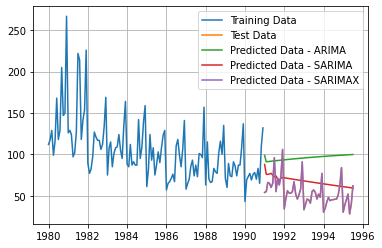

In [160]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.plot(test.index,pred_SARIMAX.predicted_mean,label='Predicted Data - SARIMAX')
plt.legend(loc='best')
plt.grid();

7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [161]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

From the above plots, we can say that there seems to be a seasonality in the data.

## Split the data into train and test and plot the training and test data.

Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [162]:
#train=df_Rose[df_Rose.index.year < 1991]
#test=df_Rose[df_Rose.index.year >= 1991]

In [163]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [164]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Last few rows of Training Data


,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


First few rows of Test Data


,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


Last few rows of Test Data


,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [165]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

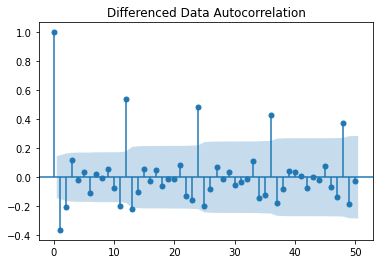

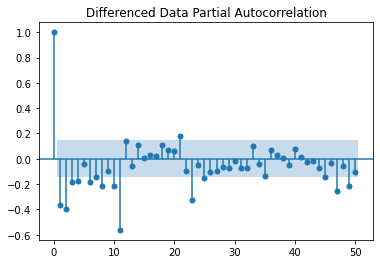

In [166]:
plot_acf(df_Rose2['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_Rose2['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [167]:
manual_ARIMA = ARIMA(train['Rose'], order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -665.576
Method:                           css   S.D. of innovations             38.931
Date:                Sun, 07 Nov 2021   AIC                           1335.153
Time:                        16:47:59   BIC                           1340.903
Sample:                    02-01-1980   HQIC                          1337.489
                         - 12-01-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1527      3.401      0.045      0.964      -6.514       6.819


C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M

We get a comparatively simpler model by looking at the ACF and the PACF plots.

###### Note: When we see that both the AR(p) and the MA(q) model are of order 0, we have to convert the input variable into a 'float64' type variable else Python might throw an error.

## Predict on the Test Set using this model and evaluate the model.

In [168]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [169]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

84.13301144439681


In [170]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE,Test MAPE,RMSE
RegressionOnTime,51.433312,91.6400,NaN
NaiveModel,79.718773,145.1000,NaN
SimpleAverageModel,53.460570,94.9300,NaN
2pointTrailingMovingAverage,11.531555,13.6100,NaN
4pointTrailingMovingAverage,14.428913,19.6800,NaN
6pointTrailingMovingAverage,14.783389,21.1000,NaN
9pointTrailingMovingAverage,14.820724,20.9500,NaN
"Alpha=0.995,SimpleExponentialSmoothing",36.796227,63.8800,NaN
"Alpha=0.3,SimpleExponentialSmoothing",47.504821,83.7100,NaN
"Alpha=0.4,SimpleExponentialSmoothing",53.767406,95.5000,NaN


## Building the most optimum model on the Full Data.

In [192]:
full_data_model = sm.tsa.statespace.SARIMAX(df_Rose2['Rose'],
                                order=(1,1,1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\athisya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -667.172
Date:                            Sun, 07 Nov 2021   AIC                           1344.344
Time:                                    22:11:43   BIC                           1359.720
Sample:                                01-01-1980   HQIC                          1350.588
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1947      0.086      2.264      0.024       0.026       0.363
ma.L1         -0.9137      0.045   

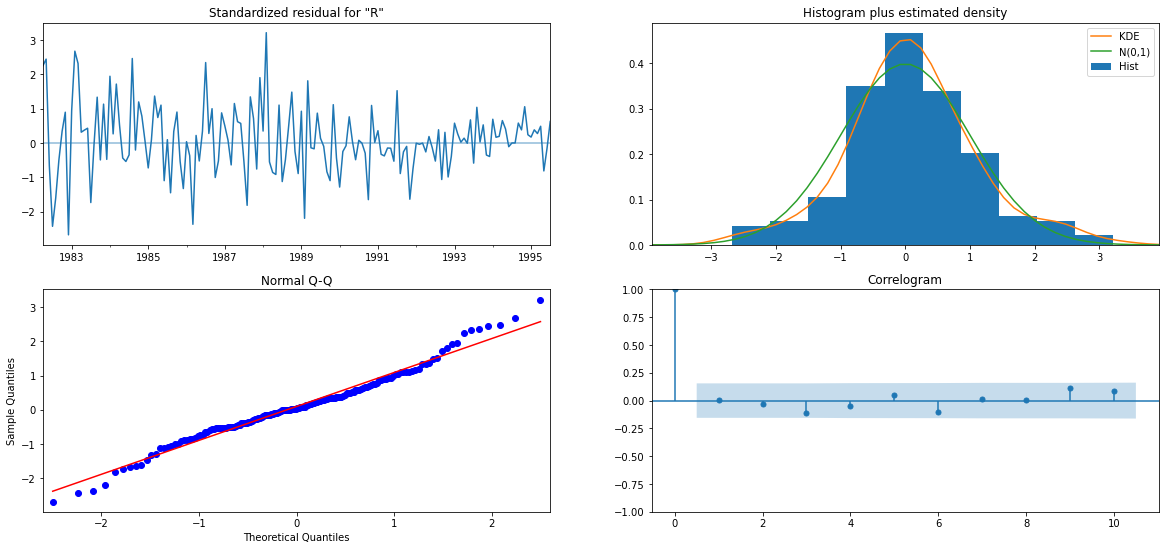

In [193]:
results_full_data_model.plot_diagnostics(figsize=(20,9));


8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

## Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

In [194]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [195]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,49.348977,19.151480,11.812765,86.885188
1995-09-01,42.726732,17.100310,9.210740,76.242725
1995-10-01,47.917205,17.249292,14.109214,81.725197
1995-11-01,53.456106,17.349402,19.451903,87.460308
1995-12-01,77.632302,17.440679,43.449199,111.815404


In [196]:
rmse = mean_squared_error(df_Rose,results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 31.7467242861175


In [197]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-07-31', freq='M'))

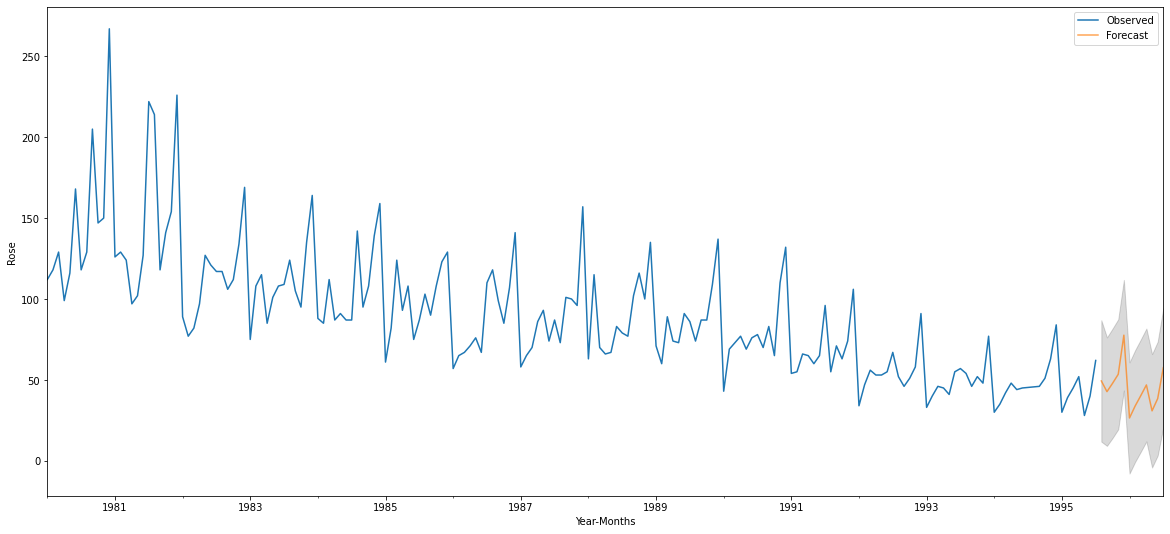

In [198]:
# plot the forecast along with the confidence band

axis = df_Rose.plot(label='Observed',figsize=(20,9))
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

In [199]:
resultsDf

,Test RMSE,Test MAPE,RMSE
RegressionOnTime,51.433312,91.6400,NaN
NaiveModel,79.718773,145.1000,NaN
SimpleAverageModel,53.460570,94.9300,NaN
2pointTrailingMovingAverage,11.531555,13.6100,NaN
4pointTrailingMovingAverage,14.428913,19.6800,NaN
6pointTrailingMovingAverage,14.783389,21.1000,NaN
9pointTrailingMovingAverage,14.820724,20.9500,NaN
"Alpha=0.995,SimpleExponentialSmoothing",36.796227,63.8800,NaN
"Alpha=0.3,SimpleExponentialSmoothing",47.504821,83.7100,NaN
"Alpha=0.4,SimpleExponentialSmoothing",53.767406,95.5000,NaN


10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future Rose.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.